# EEG Preprocessing with MNE

In [10]:
import pandas as pd
import numpy as np
import mne
from mne.io import RawArray

%matplotlib inline

### Load raw EEG and events from csv
Using just one file for testing

In [2]:
FILE = "data/subj1_series1_data.csv"
data = pd.read_csv(FILE)

In [3]:
#store channel names
channels = list(data.columns[1:]) #skip first, that's ID
print(channels)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7', 'C3', 'Cz', 'C4', 'T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10']


In [4]:
#convert EEG (stored as INT16) to microVolts
data = 1e-6*np.array(data[channels]).T

In [5]:
#create metadata
n_channels = len(channels)
sampling = 500 #Hz
channel_types = ['eeg']*n_channels
montage = 'standard_1005'

info = mne.create_info(channels, sampling, channel_types, montage)

<ipython-input-5-43ff90d719c3>:7: DeprecationWarning: Passing montage to create_info is deprecated and will be removed in 0.21, use raw.set_montage (or epochs.set_montage, etc.) instead
  info = mne.create_info(channels, sampling, channel_types, montage)


In [6]:
info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 32 EEG
 custom_ref_applied: False
 dig: 35 items (3 Cardinal, 32 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 500.0 Hz
>

In [44]:
raw = RawArray(data,info,verbose=False)
raw.set_eeg_reference('average', projection=True)

<RawArray | 32 x 119496 (239.0 s), ~29.3 MB, data loaded>

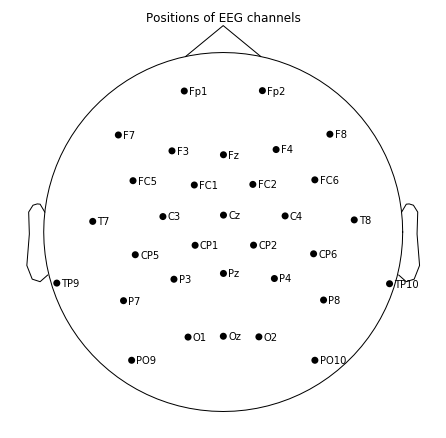

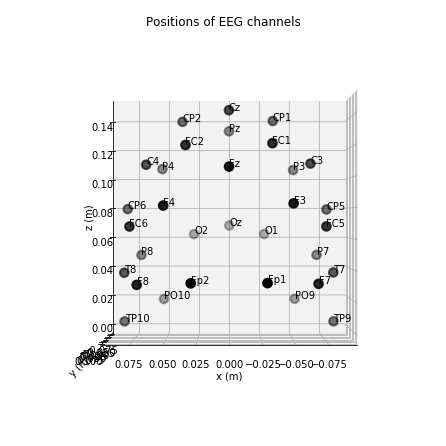

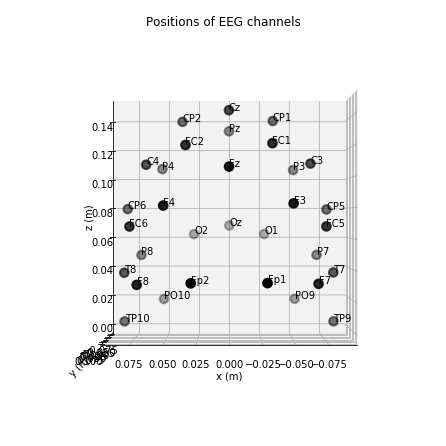

In [13]:
raw.plot_sensors(show_names=True, title="Positions of EEG channels")
raw.plot_sensors("3d",show_names=True, title="Positions of EEG channels")

## Actual preprocessing
#### Filtering